In [1]:
#import dependencies
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load files from resource into dataframe
data = Path('Resource/Diabetes_Prediction_Updated.csv')
df_origin = pd.read_csv(data)
df = df_origin.copy()
df.head()

,Diabetes_011,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0,0,1,0,40,1,0,0,0,0,...,0,1,0,5,18,15,1,0,9,4
1,0,0,0,0,25,1,0,0,1,0,...,0,0,1,3,0,0,0,0,7,6
2,0,1,1,1,28,0,0,0,0,1,...,0,1,1,5,30,30,1,0,9,4
3,0,1,0,1,27,0,0,0,1,1,...,0,1,0,2,0,0,0,0,11,3
4,0,1,1,1,24,0,0,0,1,1,...,0,1,0,2,3,0,0,0,11,5


In [3]:
#categorize type 1 and type2 diabete into patient with diabete
df1 = df[(df["Diabetes_011"]==0)]
df2 = df[(df["Diabetes_011"]==1)]
df1

,Diabetes_011,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0,0,1,0,40,1,0,0,0,0,...,0,1,0,5,18,15,1,0,9,4
1,0,0,0,0,25,1,0,0,1,0,...,0,0,1,3,0,0,0,0,7,6
2,0,1,1,1,28,0,0,0,0,1,...,0,1,1,5,30,30,1,0,9,4
3,0,1,0,1,27,0,0,0,1,1,...,0,1,0,2,0,0,0,0,11,3
4,0,1,1,1,24,0,0,0,1,1,...,0,1,0,2,3,0,0,0,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245485,0,1,1,1,30,1,0,0,1,1,...,0,1,0,2,10,5,0,0,10,6
245487,0,1,1,1,25,1,0,0,1,1,...,0,1,0,3,0,0,0,1,8,6
245489,0,0,0,1,20,0,0,0,1,1,...,0,0,1,4,0,4,1,0,1,4
245490,0,0,1,1,25,0,0,0,1,1,...,0,1,0,3,0,0,0,0,9,4


In [4]:
#make even balance amount of data for patients without diabete to patients with diabete
no_to_drop = len(df1["Diabetes_011"])-len(df2["Diabetes_011"])
df1 = df1.drop(df1.index[:no_to_drop])
df1.reset_index(inplace=True,drop=True)
df1.head()

,Diabetes_011,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0,0,0,1,18,0,0,0,1,1,...,0,1,0,2,5,1,0,0,2,5
1,0,1,0,1,23,1,0,0,1,1,...,1,1,0,1,0,0,0,0,8,6
2,0,0,0,1,24,0,0,0,1,1,...,0,1,0,2,0,0,0,0,9,6
3,0,0,0,1,39,1,0,0,1,0,...,1,1,0,2,0,0,0,0,10,6
4,0,1,1,1,29,1,0,0,0,1,...,0,1,0,2,0,1,0,0,10,6


In [5]:
#concat both dataframe for patient with diabete and without diabete
df = pd.concat([df1,df2], axis=0, ignore_index= True)
df

,Diabetes_011,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0,0,0,1,18,0,0,0,1,1,...,0,1,0,2,5,1,0,0,2,5
1,0,1,0,1,23,1,0,0,1,1,...,1,1,0,1,0,0,0,0,8,6
2,0,0,0,1,24,0,0,0,1,1,...,0,1,0,2,0,0,0,0,9,6
3,0,0,0,1,39,1,0,0,1,0,...,1,1,0,2,0,0,0,0,10,6
4,0,1,1,1,29,1,0,0,0,1,...,0,1,0,2,0,1,0,0,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69125,1,1,1,1,26,0,0,0,1,1,...,0,1,1,3,0,1,0,1,4,4
69126,1,1,1,1,28,0,0,0,1,1,...,0,1,1,3,0,30,0,0,7,3
69127,1,1,1,1,24,1,0,0,1,0,...,0,1,0,3,0,0,0,1,9,4
69128,1,1,0,1,22,0,0,0,1,1,...,0,1,0,3,0,0,0,0,8,3


# Porbability of each factor influencing Diabetes

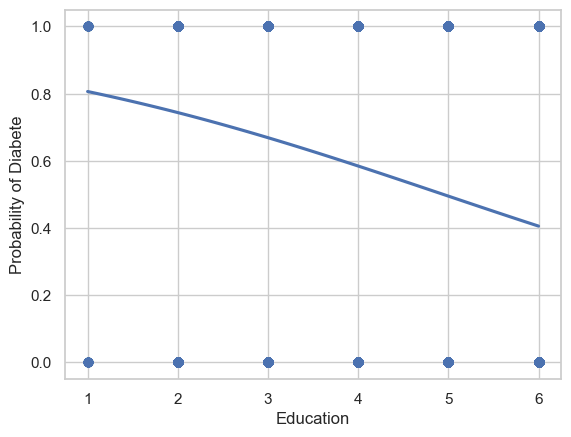

In [6]:
# Plot logistic regression curve
sns.set(style="whitegrid")
sns.regplot(x='Education', y='Diabetes_011', data=df, logistic=True, ci=None)
plt.xlabel("Education")
plt.ylabel('Probability of Diabete')
plt.savefig("Output/Education.PNG")

In [8]:
# Correlation of each factor
sorted_corr = df.corr()['Diabetes_011'].sort_values(ascending=False)
sorted_corr

Diabetes_011            1.000000
GenHlth                 0.420672
HighBP                  0.405053
BMI                     0.315387
Age                     0.310392
HighChol                0.302285
DiffWalk                0.288364
HeartDiseaseorAttack    0.222762
PhysHlth                0.220550
Stroke                  0.129846
CholCheck               0.127537
Smoke                   0.116341
MentHlth                0.095654
NoDocbcCost             0.040829
Sex                     0.033265
AnyHealthcare           0.032135
Fruits                 -0.065001
Veggies                -0.097776
AlcoholConsump         -0.098966
Education              -0.177927
PhysicalActivity       -0.188160
Name: Diabetes_011, dtype: float64

# Logistic Regression Model

In [9]:
#scale the dataframe beside diabete column
df_prep = df.drop(columns=["Diabetes_011"])
diabete_scaled = StandardScaler().fit_transform(df_prep)

In [10]:
#turn scaled dataset into dataframe
df_scaled = pd.DataFrame(diabete_scaled)
df_scaled.columns = df_prep.columns
df_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,Veggies,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,-1.107498,-1.041086,0.169786,-1.689523,-0.930758,-0.25687,-0.410832,0.624249,0.784242,-1.977498,-0.214508,0.223039,-0.320813,-0.729326,0.163025,-0.474259,-0.570747,-0.932437,-2.245839,0.060866
1,0.902936,-1.041086,0.169786,-0.972667,1.074393,-0.25687,-0.410832,0.624249,0.784242,0.505689,4.661829,0.223039,-0.320813,-1.626528,-0.457886,-0.574417,-0.570747,-0.932437,-0.168745,1.045580
2,-1.107498,-1.041086,0.169786,-0.829296,-0.930758,-0.25687,-0.410832,0.624249,0.784242,0.505689,-0.214508,0.223039,-0.320813,-0.729326,-0.457886,-0.574417,-0.570747,-0.932437,0.177438,1.045580
3,-1.107498,-1.041086,0.169786,1.321271,1.074393,-0.25687,-0.410832,0.624249,-1.275116,0.505689,4.661829,0.223039,-0.320813,-0.729326,-0.457886,-0.574417,-0.570747,-0.932437,0.523620,1.045580
4,0.902936,0.960535,0.169786,-0.112440,1.074393,-0.25687,-0.410832,-1.601924,0.784242,0.505689,-0.214508,0.223039,-0.320813,-0.729326,-0.457886,-0.474259,-0.570747,-0.932437,0.523620,1.045580


In [11]:
#prepare X and y dataset for the model
y = df["Diabetes_011"]
X = df_scaled
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(51847, 20)

In [12]:
# create logistic regression model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=1000,
                                random_state=2)

#fit the model
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=2)

In [13]:
# create prediction
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(100)

,Prediction,Actual
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,1,0
97,0,0
98,0,0


In [14]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7595324885725858

In [15]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual w/o Diabete", "Actual w/ Diabete"], columns=["Predicted w/o Diabete", "Predicted w/Diabete"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Logistic Regression Model")
print("-------------------------------------------------------")
print("Confusion Matrix")
display(cm_df)
print("-------------------------------------------------------")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Logistic Regression Model
-------------------------------------------------------
Confusion Matrix


,Predicted w/o Diabete,Predicted w/Diabete
Actual w/o Diabete,6408,2233
Actual w/ Diabete,1923,6719


-------------------------------------------------------
Accuracy Score : 0.7595324885725858
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      8641
           1       0.75      0.78      0.76      8642

    accuracy                           0.76     17283
   macro avg       0.76      0.76      0.76     17283
weighted avg       0.76      0.76      0.76     17283



# Testing for probability chart for Supervised Learning

In [16]:
y_proba = classifier.predict_proba(X_test)[:, 1]

In [17]:
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

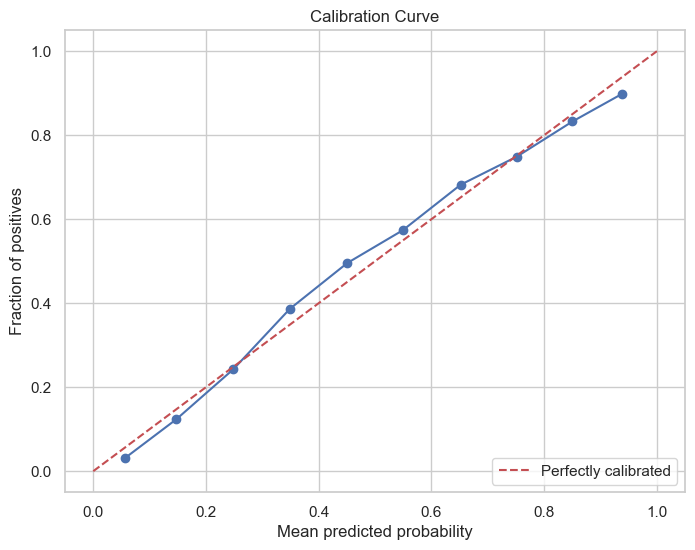

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Change X to respective dataset to test the model

In [19]:
Health_wellness = df_scaled[["HighBP","HighChol","CholCheck","BMI","DiffWalk"]]
Behavioral = df_scaled[["Smoke","Fruits","Veggies","AlcoholConsump","PhysicalActivity"]]
Medical = df_scaled[["HeartDiseaseorAttack","Stroke","AnyHealthcare","GenHlth","MentHlth","PhysHlth"]]
Bio = df_scaled[["Sex","Age","Education","NoDocbcCost"]]

In [21]:
#prepare X and y dataset for the model
y = df["Diabetes_011"]
X = df_scaled[["HighBP","HighChol","CholCheck","BMI",
              "Smoke","PhysicalActivity",
              "HeartDiseaseorAttack","Stroke","AnyHealthcare","GenHlth",
              "Age","Education","NoDocbcCost"]]
#X = pd.concat([Health_wellness, Medical,Bio,Behavioral], axis=1) #for concat columns

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

# create logistic regression model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=1000,
                                random_state=1)

#fit the model
classifier.fit(X_train, y_train)

# create prediction
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(100)

,Prediction,Actual
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,1,0
97,0,0
98,0,0


In [22]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual w/o Diabete", "Actual w/ Diabete"], columns=["Predicted w/o Diabete", "Predicted w/Diabete"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Reduced size Logistic Regression")
print("-------------------------------------------------------")
print("Confusion Matrix")
display(cm_df)
print("-------------------------------------------------------")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Reduced size Logistic Regression
-------------------------------------------------------
Confusion Matrix


,Predicted w/o Diabete,Predicted w/Diabete
Actual w/o Diabete,6387,2254
Actual w/ Diabete,1955,6687


-------------------------------------------------------
Accuracy Score : 0.7564658913383093
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      8641
           1       0.75      0.77      0.76      8642

    accuracy                           0.76     17283
   macro avg       0.76      0.76      0.76     17283
weighted avg       0.76      0.76      0.76     17283



# Decision Tree Model

In [23]:
from sklearn import tree

In [25]:
X_dt = df.copy()
X_dt.drop('Diabetes_011', axis=1, inplace=True)
y_dt = df['Diabetes_011'].values.reshape(-1,1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, random_state=78)

In [27]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

In [28]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

In [30]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual w/o Diabete", "Actual w/ Diabete"], columns=["Predicted w/o Diabete", "Predicted w/Diabete"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Decision tree")
print("-------------------------------------------------------")
print("Confusion Matrix")
display(cm_df)
print("-------------------------------------------------------")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Decision tree
-------------------------------------------------------
Confusion Matrix


,Predicted w/o Diabete,Predicted w/Diabete
Actual w/o Diabete,5837,2759
Actual w/ Diabete,2977,5710


-------------------------------------------------------
Accuracy Score : 0.6681131747960424
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      8596
           1       0.67      0.66      0.67      8687

    accuracy                           0.67     17283
   macro avg       0.67      0.67      0.67     17283
weighted avg       0.67      0.67      0.67     17283



# Random Forest Model

In [32]:
X_rf = df.copy()
X_rf.drop('Diabetes_011', axis=1, inplace=True)
y_rf = df['Diabetes_011'].ravel()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, random_state=78)

In [34]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [35]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual w/o Diabete", "Actual w/ Diabete"], columns=["Predicted w/o Diabete", "Predicted w/Diabete"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Random Forest")
print("-------------------------------------------------------")
print("Confusion Matrix")
display(cm_df)
print("-------------------------------------------------------")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Random Forest
-------------------------------------------------------
Confusion Matrix


,Predicted w/o Diabete,Predicted w/Diabete
Actual w/o Diabete,6047,2549
Actual w/ Diabete,1828,6859


-------------------------------------------------------
Accuracy Score : 0.7467453567089047
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      8596
           1       0.73      0.79      0.76      8687

    accuracy                           0.75     17283
   macro avg       0.75      0.75      0.75     17283
weighted avg       0.75      0.75      0.75     17283



In [36]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
print("Importance of features")
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

Importance of features


[(0.1864302467679516, 'BMI'),
 (0.0898289128411255, 'HighBP'),
 (0.04240623506847748, 'HighChol'),
 (0.02934995792585796, 'AnyHealthcare'),
 (0.02855808420819332, 'Smoke'),
 (0.022898817687083038, 'Stroke'),
 (0.02217326506054665, 'GenHlth'),
 (0.02002985876190373, 'HeartDiseaseorAttack'),
 (0.013105120020375493, 'NoDocbcCost'),
 (0.010819029142625303, 'PhysicalActivity'),
 (0.010060213694235806, 'Age'),
 (0.008577294022198725, 'Education'),
 (0.0066287971941271905, 'CholCheck')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

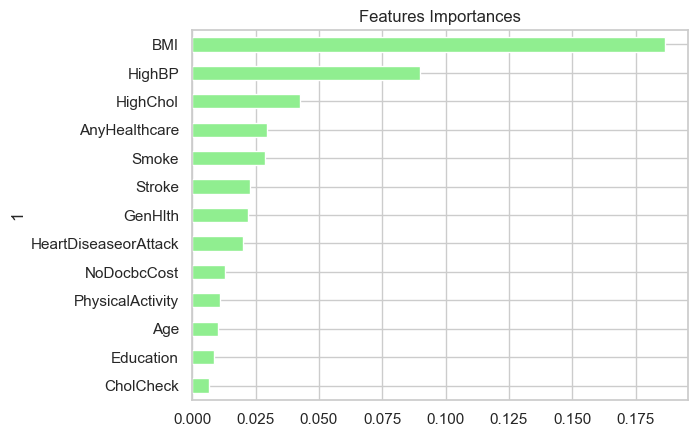

In [37]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

# Train the model
model.fit(X_train_scaled, y_train)

# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [40]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual w/o Diabete", "Actual w/ Diabete"], columns=["Predicted w/o Diabete", "Predicted w/Diabete"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

# Displaying results
print("KNN model")
print("-------------------------------------------------------")
print("Confusion Matrix")
display(cm_df)
print("-------------------------------------------------------")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

KNN model
-------------------------------------------------------
Confusion Matrix


,Predicted w/o Diabete,Predicted w/Diabete
Actual w/o Diabete,6047,2549
Actual w/ Diabete,1828,6859


-------------------------------------------------------
Accuracy Score : 0.7091940056703119
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      8596
           1       0.73      0.79      0.76      8687

    accuracy                           0.75     17283
   macro avg       0.75      0.75      0.75     17283
weighted avg       0.75      0.75      0.75     17283

